# 01. Import Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Import Data

In [48]:
# Path to main folder
path = r'C:\Users\jmacs\Documents\Career Foundry Tasks\KingCountySales'

In [49]:
# Import kc_house_data
kc_house_data = pd.read_csv(os.path.join(path, 'kc_house_data_clean.csv'), index_col = False)

In [50]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [51]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category
0,7129300520,2014-10-13,"$221,900",3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,Low price
1,6414100192,2014-12-09,"$538,000",3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,Middle price
2,5631500400,2015-02-25,"$180,000",2,1.00,770,10000,1.0,0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,Low price
3,2487200875,2014-12-09,"$604,000",4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,Middle price
4,1954400510,2015-02-18,"$510,000",3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,Middle price


In [52]:
#checking data info
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21594 entries, 0 to 21593
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21594 non-null  int64  
 1   date            21594 non-null  object 
 2   price           21594 non-null  object 
 3   bedrooms        21594 non-null  int64  
 4   bathrooms       21594 non-null  float64
 5   sqft_living     21594 non-null  int64  
 6   sqft_lot        21594 non-null  int64  
 7   floors          21594 non-null  float64
 8   waterfront      21594 non-null  int64  
 9   view            21594 non-null  int64  
 10  condition       21594 non-null  int64  
 11  grade           21594 non-null  int64  
 12  sqft_above      21594 non-null  int64  
 13  sqft_basement   21594 non-null  int64  
 14  yr_built        21594 non-null  int64  
 15  yr_renovated    913 non-null    float64
 16  zipcode         21594 non-null  int64  
 17  lat             21594 non-null 

In [53]:
# checking dataframe for missing values
kc_house_data.isnull().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated      20681
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
Price category        0
dtype: int64

In [54]:
# Changing data type for 'price' to integer
kc_house_data['price'] = kc_house_data['price'].replace('[\$\,\.]', '', regex=True).astype(int)

In [55]:
kc_house_data['price'] = kc_house_data['price'].astype(int)

In [59]:
# exporting kc_house_data dataframe
kc_house_data.to_csv(os.path.join(path, 'kc_house_data_clean.csv'))

# 03. Data Prep for Regression Analysis

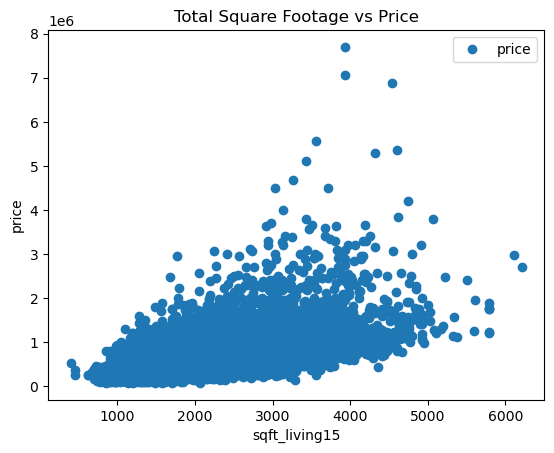

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
kc_house_data.plot(x = 'sqft_living15', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Square Footage vs Price')  
plt.xlabel('sqft_living15')  
plt.ylabel('price')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = kc_house_data['sqft_living15'].values.reshape(-1,1)
y = kc_house_data['price'].values.reshape(-1,1)

In [32]:
X

array([[1340],
       [1690],
       [2720],
       ...,
       [1020],
       [1410],
       [1020]], dtype=int64)

In [33]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]])

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression Analysis

Hypothesis:

If a home has a higher grade and higher square footage of living space, then the higher the home price will be.

In [35]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

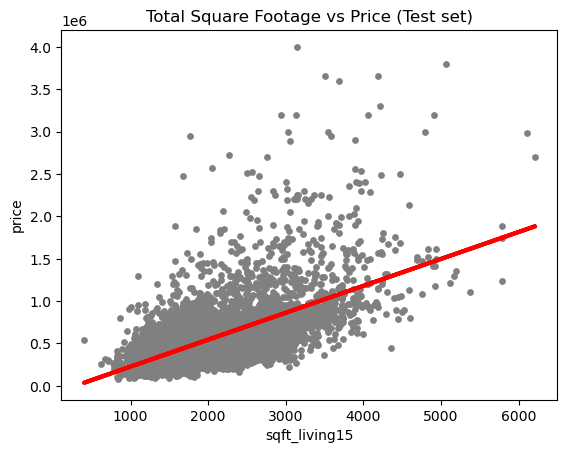

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Square Footage vs Price (Test set)')
plot_test.xlabel('sqft_living15')
plot_test.ylabel('price')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[317.56278264]]
Mean squared error:  79869363492.49812
R2 score:  0.3588058630175991


The slope is in a positive direction meaning as X rises so does y.
Mean squared error number is a rather large number meaning this may not be the best model to represent the data.
R2 score is only .35 making it further away from 1, further proving the fact this model may not be the best to represent the data.

In [42]:
y_predicted

array([[747876.67163208],
       [462070.16725259],
       [487475.1898641 ],
       ...,
       [411260.12202956],
       [389030.72724449],
       [315991.2872364 ]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000,7.478767e+05
1,635000,4.620702e+05
2,456000,4.874752e+05
3,415000,4.017332e+05
4,450000,5.954465e+05
5,526750,5.509877e+05
6,372000,6.589591e+05
7,3000000,1.036859e+06
8,473000,6.684860e+05
9,465000,3.668013e+05


Our last test also contributes to the fact that the predicted numbers are pretty far off of our actual values.

There is a lot of data and a lot of outliers. There are different factors contributing to the price of a home in the King County area. Only looking at the square feet is not a reliable variable for prediction of price. 